<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/VNFOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/FOODVN1/Train" 
valid_image_files_path = "/content/drive/MyDrive/FOODVN1/Validation" 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(150, 150),               
    class_mode='categorical')

Found 1626 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=20,batch_size=128,verbose=1, validation_data=validation_generator)

Epoch 1/20
51/51 [==============================] - 281s 5s/step - loss: 2.1190 - accuracy: 0.3137 - val_loss: 2.2181 - val_accuracy: 0.3395
Epoch 2/20
51/51 [==============================] - 274s 5s/step - loss: 1.4572 - accuracy: 0.5098 - val_loss: 1.7336 - val_accuracy: 0.4475
Epoch 3/20
51/51 [==============================] - 274s 5s/step - loss: 1.1409 - accuracy: 0.6156 - val_loss: 1.6948 - val_accuracy: 0.4907
Epoch 4/20
51/51 [==============================] - 315s 6s/step - loss: 0.9720 - accuracy: 0.6716 - val_loss: 1.4354 - val_accuracy: 0.5494
Epoch 5/20
51/51 [==============================] - 272s 5s/step - loss: 0.6971 - accuracy: 0.7645 - val_loss: 1.7630 - val_accuracy: 0.5463
Epoch 6/20
51/51 [==============================] - 271s 5s/step - loss: 0.5841 - accuracy: 0.8087 - val_loss: 1.4835 - val_accuracy: 0.5988
Epoch 7/20
51/51 [==============================] - 271s 5s/step - loss: 0.3902 - accuracy: 0.8752 - val_loss: 1.9367 - val_accuracy: 0.5679
Epoch 8/20
51

In [ ]:
model.save("FOOD.h5")

In [ ]:
from tensorflow.keras.models import load_model

model_food=load_model('FOOD.h5')

1/1 [==============================] - 0s 196ms/step
BANH PIA


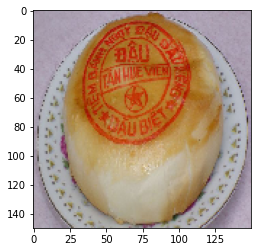

1/1 [==============================] - 0s 60ms/step
BANH XEO


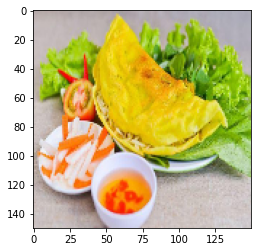

1/1 [==============================] - 0s 61ms/step
BO NE


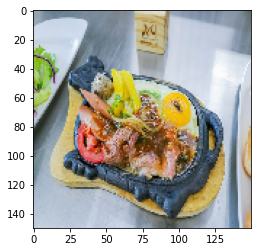

1/1 [==============================] - 0s 58ms/step
BANH MI


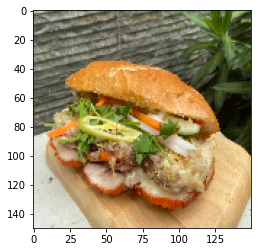

1/1 [==============================] - 0s 71ms/step
COM SUON


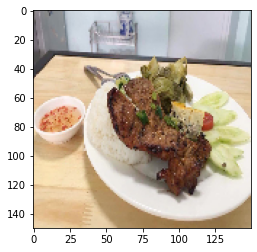

1/1 [==============================] - 0s 58ms/step
PHO


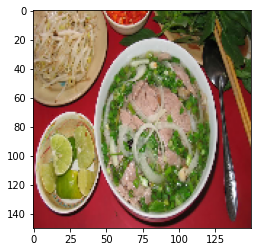

1/1 [==============================] - 0s 71ms/step
BUN DAU MAM TOM


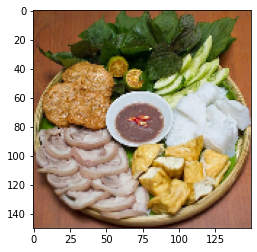

1/1 [==============================] - 0s 58ms/step
GOI CUON


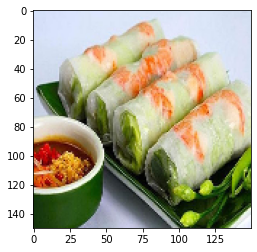

1/1 [==============================] - 0s 60ms/step
BANH TRANG TRON


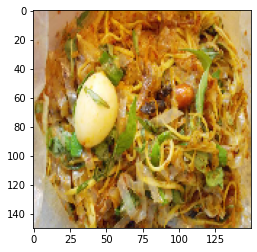

1/1 [==============================] - 0s 57ms/step
NEM CHUA


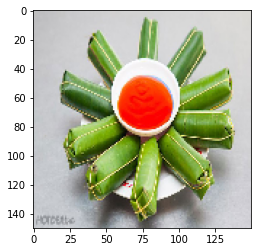

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
test="/content/drive/MyDrive/Test food VN"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_food.predict(img)
  if round(result[0][0])==1:
    prediction='BANH MI'
  if round(result[0][1])==1:
    prediction='BANH PIA'
  if round(result[0][2])==1:
    prediction='BANH TRANG TRON'
  if round(result[0][3])==1:
    prediction='BANH XEO'
  if round(result[0][4])==1:
    prediction='BO NE'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='COM SUON'
  if round(result[0][7])==1:
    prediction='GOI CUON'
  if round(result[0][8])==1:
    prediction='NEM CHUA'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()